In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data-1.csv")
df3=pd.read_csv("timeseries.csv")

In [3]:
print(df)

       payment_id  customer_id  staff_id  rental_id  amount payment_date
0           17503          341         2       1520    7.99      25:47.0
1           17504          341         1       1778    1.99      23:15.0
2           17505          341         1       1849    7.99      41:46.0
3           17506          341         2       2829    2.99      39:57.0
4           17507          341         2       3130    7.99      31:49.0
...           ...          ...       ...        ...     ...          ...
14591       32094          245         2      12682    2.99      44:30.0
14592       32095          251         1      14107    0.99      44:30.0
14593       32096          252         2      13756    4.99      44:30.0
14594       32097          263         1      15293    0.99      44:30.0
14595       32098          264         2      14243    2.99      44:30.0

[14596 rows x 6 columns]


In [4]:

# Define the lambda function to operate on multiple columns
function1 = lambda x1: x1['amount'] 
function2= lambda x2: x2['payment_date']

# Apply the lambda function to create the new column
df['amount'] = df.apply(function1, axis=1)
df['payement_date']=df.apply(function2,axis=1)


# Create an array
AM = np.array(df['amount']) #AM is amount
NA=(AM-min(AM))/(max(AM)-min(AM)) #NA is normalized payment between 0 and 1
PD=np.array(df['payement_date']) #PD is payement date

print('Normalized Payment')
print(NA)
print('Payement date (PD)')
print(PD)

# Define a condition with definition as follows: 
#greater than b is high, between a and b is medium, less than a is low 
a=0.35; b=0.65
condition1 = NA > a 
condition2 = NA > b

# Use np.where() to select elements
#Qualified amount =QA
QA= np.where(condition1,np.where(condition2,'high', 'medium'), 'low') 
print(QA)


print(NA[2], QA[5],len(QA))

count_h=0
count_m=0
count_l=0
for i in range(1,len(QA)):
    if QA[i]=='high':
        count_h=count_h+1
    elif QA[i]=='medium':
        count_m=count_m+1
    else:
        count_l=count_l+1
    
print('')
print ('The number of high amounts is=', count_h,''
       '\nThe number of medium amounts is=', count_m, 
       '\nThe number of low amounts is=', count_l)
        

Normalized Payment
[0.66638866 0.16597164 0.66638866 ... 0.41618015 0.08256881 0.24937448]
Payement date (PD)
['25:47.0' '23:15.0' '41:46.0' ... '44:30.0' '44:30.0' '44:30.0']
['high' 'low' 'high' ... 'medium' 'low' 'low']
0.6663886572143453 medium 14596

The number of high amounts is= 1405 
The number of medium amounts is= 5636 
The number of low amounts is= 7554


In [5]:
print(df3)

          country         day  total_revenue  count
0     Afghanistan  2007-02-15           2.99      1
1     Afghanistan  2007-02-18           1.98      2
2     Afghanistan  2007-03-17           2.99      1
3     Afghanistan  2007-03-18           2.99      1
4     Afghanistan  2007-03-19           0.99      1
...           ...         ...            ...    ...
2470       Zambia  2007-04-12           8.98      2
2471       Zambia  2007-04-27          11.97      3
2472       Zambia  2007-04-29           2.99      1
2473       Zambia  2007-04-30           4.98      2
2474       Zambia  2007-05-14           0.99      1

[2475 rows x 4 columns]


In [6]:
function3 = lambda x3: x3['total_revenue'] 
df3['total_revenue'] = df3.apply(function3, axis=1)
TR = np.array(df3['total_revenue']) 
print (TR)

function4 = lambda x4: x4['day'] 
df3['day'] = df3.apply(function4, axis=1)
day = np.array(df3['day']) 
print(day)

function5 = lambda x5: x5['country'] 
df3['country'] = df3.apply(function5, axis=1)
country = np.array(df3['country']) 
print(country)




[2.99 1.98 2.99 ... 2.99 4.98 0.99]
['2007-02-15' '2007-02-18' '2007-03-17' ... '2007-04-29' '2007-04-30'
 '2007-05-14']
['Afghanistan' 'Afghanistan' 'Afghanistan' ... 'Zambia' 'Zambia' 'Zambia']


In [7]:

T_Revenue_Ca=[]
T_Revenue_Ir=[]
T_Revenue_US=[]
Date_Ca=[]
Date_Ir=[]
Date_US=[]
for i in range(2475):
    if country[i]=='Canada':
        T_Revenue_Ca.append(TR[i])
        Date_Ca.append(day[i])
    if country[i]=='Iran':
        T_Revenue_Ir.append(TR[i])
        Date_Ir.append(day[i])
    if country[i]=='United States':
        T_Revenue_US.append(TR[i])
        Date_US.append(day[i])

   

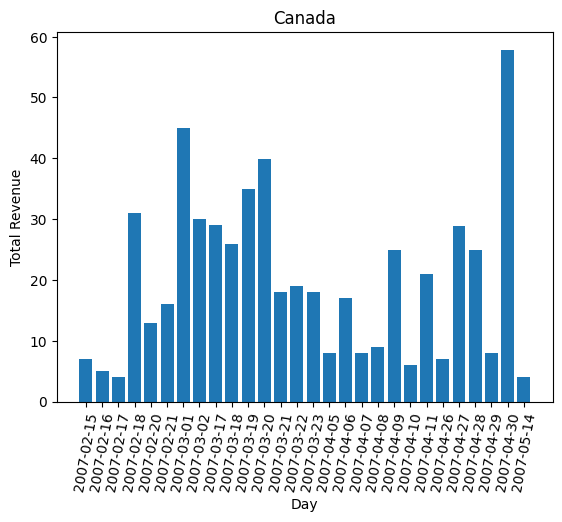

In [8]:

# Plotting the bar graph for Canada
plt.bar(Date_Ca,T_Revenue_Ca)

# Customize the plot
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.title('Canada')
plt.xticks(rotation=80)

# Show the plot
plt.show()

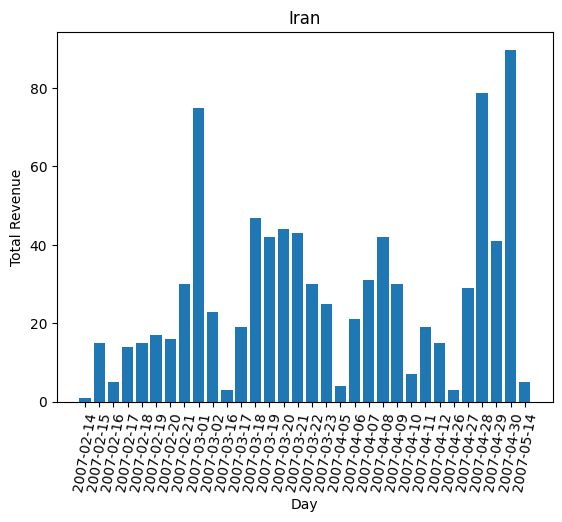

In [9]:
# Plotting the bar graph for Iran
plt.bar(Date_Ir,T_Revenue_Ir)

# Customize the plot
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.title('Iran')
plt.xticks(rotation=80)

# Show the plot
plt.show()

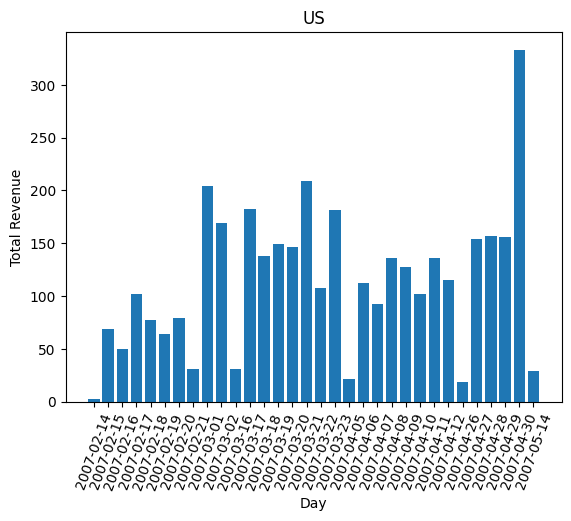

In [10]:
# Plotting the bar graph for US
plt.bar(Date_US,T_Revenue_US)

# Customize the plot
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.title('US')
plt.xticks(rotation=70)

# Show the plot
plt.show()

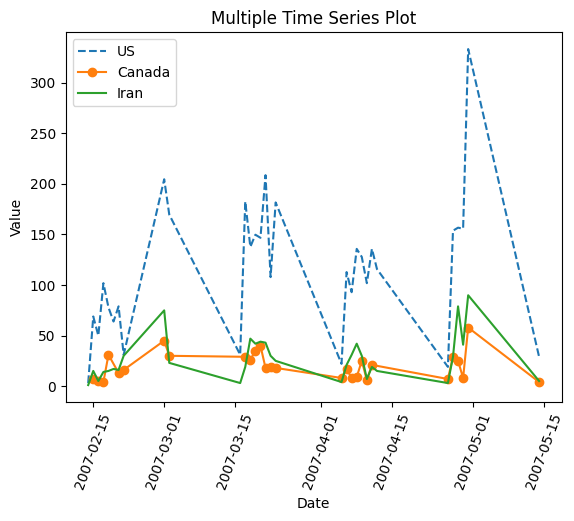

In [12]:
# Assuming you have multiple time series data
data1 = pd.DataFrame({'date': Date_US,
                      'value': T_Revenue_US})

data2 = pd.DataFrame({'date': Date_Ca,
                      'value': T_Revenue_Ca})

data3 = pd.DataFrame({'date': Date_Ir,
                      'value': T_Revenue_Ir})
# Convert the 'date' column to datetime
data1['date'] = pd.to_datetime(data1['date'])
data2['date'] = pd.to_datetime(data2['date'])
data3['date'] = pd.to_datetime(data3['date'])

# Set the 'date' column as the index
data1.set_index('date', inplace=True)
data2.set_index('date', inplace=True)
data3.set_index('date', inplace=True)

# Plot the time series
plt.plot(data1.index, data1['value'], label='US',linestyle='--')
plt.plot(data2.index, data2['value'], label='Canada',marker='o')
plt.plot(data3.index, data3['value'], label='Iran')

# Set plot title and labels
plt.title('Multiple Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')

# Show legend
plt.legend()

plt.xticks(rotation=70)

# Display the plot
plt.show()